In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy.misc as scimisc
from scipy.optimize import curve_fit

In [2]:
R      = 8.3144626   # Gas constant (SI)

mu_H2  = 2.01588     # Molar mass H2 (g/mol)
mu_He  = 4.002602    # Molar mass He (g/mol)
mu_CH4 = 16.04       # Molar mass CH4 (g/mol)
Tr     = 87.6        # Rotational temperature H2 (K)

In [3]:
dT = 1e-2 # delta T for gradient and arange function (1 K does weird things for low temps...)

In [4]:
# See for instance Irwin 2006  - Giant Planets Book 2nd ed. pp 79-83

# Partition function for rigid rotator

def rot_state(l,T):
    return (2*l+1)*np.exp(-l*(l+1)*Tr/T)

# Standard calculation summing all states
def Zrot(T):
    return sum([rot_state(l,T) for l in range(0,50)]) # 50 is way enough for infinity

# Above Zrot is not ok for homonuclear function as the wavefunction is changed if 2 protons are interchanged
# H2 with S=0 and spins antiparallel is para, H2 with S=1 and spins parallel is ortho

# Odd rotational states (ie even,parallel spin, ortho-H2)
def Zrot_o(T):
    return sum([rot_state(l,T) for l in range(1,50,2)])

# Even rotational states (ie odd,antiparallel spin, para-H2)
def Zrot_p(T):
    return sum([rot_state(l,T) for l in range(0,50,2)])

# Partition function assuming H2 is in thermal equilibrium, as S=0 is singlet and S=1 triplet
def Zrot_te(T):
    return Zrot_p(T) + 3*Zrot_o(T)


In [5]:
# Rotational energy
def Urot(Z,T):
    return R*T*T*np.gradient(np.log(Z),dT,edge_order=2)

# Heat capacity constant volume (J/mol/K) - Rotational contribution
def Cv_r(Z,T):
    return np.gradient(Urot(Z,T),dT,edge_order=2)

# Heat capacity constant volume (J/mol/K) - Translational contribution
Cv_t = 1.5*R # Not true at very low T where we reach Ttrans but not here :)

# Heat capacity constant volume (J/mol/K) - Monoatomic
Cv_mono = Cv_t

# Heat capacity constant volume (J/mol/K) - Diatomic
def Cv_diato(Cvr,T):
    return Cv_t + Cvr

# Mayer relation - Heat capacity constant pressure (J/mol/K)
def Cp(Cv):
    return Cv + R


In [6]:
# Standard calcul - not valid for homonuclear
def Cvr_std(T):
    return Cv_r(Zrot(T),T)

# Ortho
def Cvr_o(T):
    return Cv_r(3*Zrot_o(T),T)

# Para
def Cvr_p(T):
    return Cv_r(Zrot_p(T),T)

# Thermal equilibrium
def Cvr_te(T):
    return Cv_r(Zrot_te(T),T)

# Frozen 3:1 ortho-para ratio
def Cvr_frz(T):
    return 0.75*Cv_r(Zrot_o(T),T) + 0.25*Cv_r(Zrot_p(T),T)

# "Intermediate" hydrogen (de Pater and Massie, 1985)
def f_eqm(T):
    return Zrot_p(T)/Zrot_te(T)

def Cvr_int(T):
    return (1.0-f_eqm(T))*Cv_r(Zrot_o(T),T) + f_eqm(T)*Cv_r(Zrot_p(T),T)


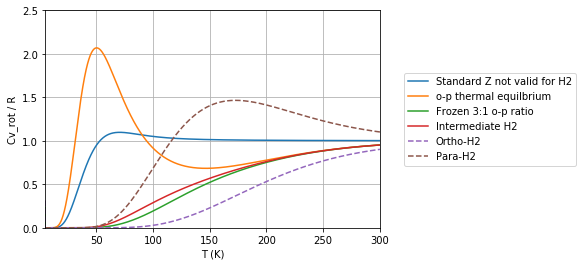

In [7]:
# Here we plot a fig similar to Fig 4.2 from Irwin, 2006
fig,ax=plt.subplots()

t_range = np.arange(5.,320.0,dT) # Important the step must be the same Dt as in gradient above

c1 = Cvr_std(t_range)/R
c2 = Cvr_te(t_range)/R
c3 = Cvr_frz(t_range)/R
c4 = Cvr_int(t_range)/R
c5 = Cvr_o(t_range)/R
c6 = Cvr_p(t_range)/R

ax.plot(t_range,c1,label='Standard Z not valid for H2')
ax.plot(t_range,c2,label='o-p thermal equilbrium')
ax.plot(t_range,c3,label='Frozen 3:1 o-p ratio')
ax.plot(t_range,c4,label='Intermediate H2')
ax.plot(t_range,c5,label='Ortho-H2',ls='--')
ax.plot(t_range,c6,label='Para-H2',ls='--')

ax.set_xlabel('T (K)')
ax.set_xlim(5,300)
ax.set_ylabel('Cv_rot / R')
ax.set_ylim(0.0,2.5)

ax.legend(loc='right',bbox_to_anchor=(1.6,0.5))
ax.grid()

plt.show()

<Figure size 432x288 with 0 Axes>

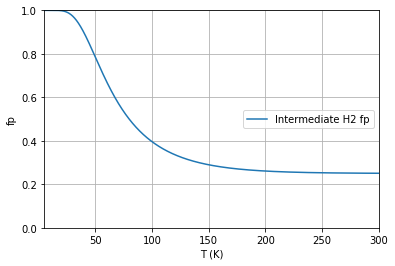

In [8]:
plt.clf()
fig,ax=plt.subplots()

ax.plot(t_range,f_eqm(t_range),label='Intermediate H2 fp')
ax.set_ylabel('fp')
ax.set_ylim(0,1)
ax.set_xlabel('T (K)')
ax.set_xlim(5,300)
ax.grid()
ax.legend(loc='right')

plt.show()

<Figure size 432x288 with 0 Axes>

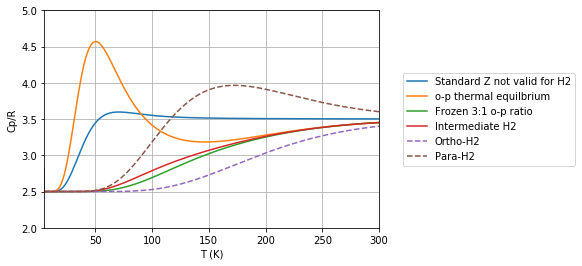

In [9]:
plt.clf()
# Now plot full H2 Cp
fig,ax=plt.subplots()

c1 = Cp(Cv_diato(Cvr_std(t_range),t_range))/R
c2 = Cp(Cv_diato(Cvr_te(t_range),t_range))/R
c3 = Cp(Cv_diato(Cvr_frz(t_range),t_range))/R
c4 = Cp(Cv_diato(Cvr_int(t_range),t_range))/R
c5 = Cp(Cv_diato(Cvr_o(t_range),t_range))/R
c6 = Cp(Cv_diato(Cvr_p(t_range),t_range))/R

ax.plot(t_range,c1,label='Standard Z not valid for H2')
ax.plot(t_range,c2,label='o-p thermal equilbrium')
ax.plot(t_range,c3,label='Frozen 3:1 o-p ratio')
ax.plot(t_range,c4,label='Intermediate H2')
ax.plot(t_range,c5,label='Ortho-H2',ls='--')
ax.plot(t_range,c6,label='Para-H2',ls='--')

ax.set_xlabel('T (K)')
ax.set_xlim(5,300)
ax.set_ylabel('Cp/R')
ax.set_ylim(2,5)

ax.legend(loc='right',bbox_to_anchor=(1.6,0.5))
ax.grid()

plt.show()

In [10]:
x_H2_ura  = 0.825
x_He_ura  = 0.152
x_CH4_ura = 0.02

x_H2_nep  = 0.81
x_He_nep  = 0.15
x_CH4_nep = 0.04

x_H2_sat  = 0.85
x_He_sat  = 0.1455
x_CH4_sat = 0.0045

x_H2_sat  = 0.85
x_He_sat  = 0.1455
x_CH4_sat = 0.0045

x_H2_jup  = 0.863
x_He_jup  = 0.134
x_CH4_jup = 0.0018

g_ura = 8.69
g_nep = 11.15
g_sat = 10.44
g_jup = 24.79

In [11]:
print('mu','Uranus','Neptune','Saturn','Jupiter')
mu_ura = x_H2_ura*mu_H2
mu_nep = x_H2_nep*mu_H2
mu_sat = x_H2_sat*mu_H2
mu_jup = x_H2_jup*mu_H2
print('H2',mu_ura,mu_nep,mu_sat,mu_jup)
mu_ura = mu_ura + x_He_ura*mu_He
mu_nep = mu_nep + x_He_nep*mu_He
mu_sat = mu_sat + x_He_sat*mu_He
mu_jup = mu_jup + x_He_jup*mu_He
print('H2+He',mu_ura,mu_nep,mu_sat,mu_jup)
mu_ura = mu_ura + x_CH4_ura*mu_CH4
mu_nep = mu_nep + x_CH4_nep*mu_CH4
mu_sat = mu_sat + x_CH4_sat*mu_CH4
mu_jup = mu_jup + x_CH4_jup*mu_CH4
print('H2+He+CH4',mu_ura,mu_nep,mu_sat,mu_jup)

('mu', 'Uranus', 'Neptune', 'Saturn', 'Jupiter')
('H2', 1.663101, 1.6328628000000003, 1.713498, 1.7397044400000001)
('H2+He', 2.271496504, 2.2332531, 2.295876591, 2.276053108)
('H2+He+CH4', 2.592296504, 2.8748531, 2.3680565909999998, 2.304925108)


<Figure size 432x288 with 0 Axes>

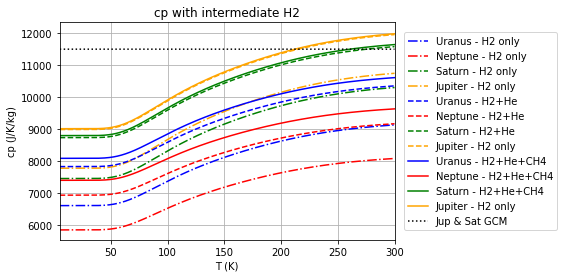

In [12]:
def cpH2(T):
    return 1000.0 * Cp(Cv_diato(Cvr_int(T),T)) / mu_H2

cp_H2   = cpH2(t_range)
cp_He   = 1000.0 * Cp(Cv_mono) / mu_He
cp_CH4  = 2080 # ok for 50-100 K : but T laws are available !

plt.clf()

fig,ax=plt.subplots(1,1,sharey=True)

ax0=ax
#ax1=ax[1]

cp_ura = x_H2_ura * mu_H2/mu_ura * cp_H2
cp_nep = x_H2_nep * mu_H2/mu_nep * cp_H2
cp_sat = x_H2_sat * mu_H2/mu_sat * cp_H2
cp_jup = x_H2_jup * mu_H2/mu_jup * cp_H2

ax0.plot(t_range,cp_ura,label='Uranus - H2 only',color='b',ls='-.')
ax0.plot(t_range,cp_nep,label='Neptune - H2 only',color='r',ls='-.')
ax0.plot(t_range,cp_sat,label='Saturn - H2 only',color='g',ls='-.')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange',ls='-.')

cp_ura = cp_ura + x_He_ura * mu_He/mu_ura * cp_He
cp_nep = cp_nep + x_He_nep * mu_He/mu_nep * cp_He
cp_sat = cp_sat + x_He_sat * mu_He/mu_sat * cp_He
cp_jup = cp_jup + x_He_jup * mu_He/mu_jup * cp_He

ax0.plot(t_range,cp_ura,label='Uranus - H2+He',color='b',ls='--')
ax0.plot(t_range,cp_nep,label='Neptune - H2+He',color='r',ls='--')
ax0.plot(t_range,cp_sat,label='Saturn - H2+He',color='g',ls='--')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange',ls='--')

cp_ura = cp_ura + x_CH4_ura * mu_CH4/mu_ura * cp_CH4
cp_nep = cp_nep + x_CH4_nep * mu_CH4/mu_nep * cp_CH4
cp_sat = cp_sat + x_CH4_sat * mu_CH4/mu_sat * cp_CH4
cp_jup = cp_jup + x_CH4_jup * mu_CH4/mu_jup * cp_CH4

ax0.plot(t_range,cp_ura,label='Uranus - H2+He+CH4',color='b')
ax0.plot(t_range,cp_nep,label='Neptune - H2+He+CH4',color='r')
ax0.plot(t_range,cp_sat,label='Saturn - H2+He+CH4',color='g')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange')

ax0.plot(t_range,11500.0*np.ones(np.size(t_range)),label='Jup & Sat GCM',color='k',ls=':')

ax0.set_ylabel('cp (J/K/kg)')
ax0.set_xlabel('T (K)')
ax0.set_xlim(5,300)
ax0.set_title('cp with intermediate H2')

ax0.grid()
ax0.legend(loc='right',bbox_to_anchor=(1.5,0.5))

plt.show()

In [13]:
# Fit the obtained cp as power laws
def powlaw_cp(T,cp0,nu):
    return cp0*(T/50.0)**nu

def powlaw_cp_hot(T,cp0,nu):
    return cp0*(T/100.0)**nu

<Figure size 432x288 with 0 Axes>

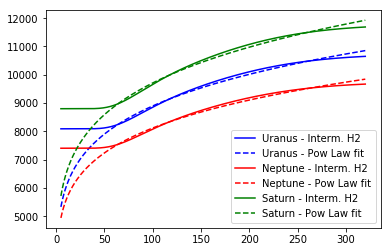

In [14]:
i_tmin = (np.abs(t_range - 50.)).argmin()
i_tmax = (np.abs(t_range - 150.)).argmin()

popt,pcov = curve_fit(powlaw_cp,t_range[i_tmin:i_tmax],cp_ura[i_tmin:i_tmax])
popt_ura_cpint = popt

popt,pcov = curve_fit(powlaw_cp,t_range[i_tmin:i_tmax],cp_nep[i_tmin:i_tmax])
popt_nep_cpint = popt

popt,pcov = curve_fit(powlaw_cp,t_range[i_tmin:i_tmax],cp_sat[i_tmin:i_tmax])
popt_sat_cpint = popt

plt.clf()
fig,ax=plt.subplots()

ax.plot(t_range,cp_ura,label='Uranus - Interm. H2',color='b')
ax.plot(t_range,powlaw_cp(t_range,*popt_ura_cpint),label='Uranus - Pow Law fit',color='b',ls='--')
ax.plot(t_range,cp_nep,label='Neptune - Interm. H2',color='r')
ax.plot(t_range,powlaw_cp(t_range,*popt_nep_cpint),label='Neptune - Pow Law fit',color='r',ls='--')
ax.plot(t_range,cp_sat,label='Saturn - Interm. H2',color='g')
ax.plot(t_range,powlaw_cp(t_range,*popt_sat_cpint),label='Saturn - Pow Law fit',color='g',ls='--')

ax.legend(loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

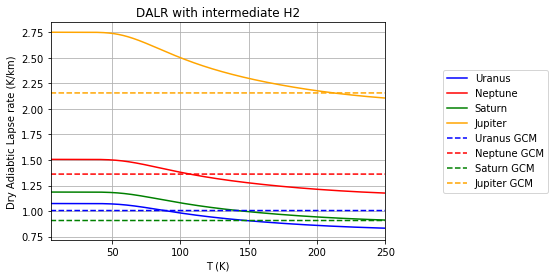

In [15]:
dalr_gcm_ura = np.ones(np.size(t_range)) * g_ura / 8.643
dalr_gcm_nep = np.ones(np.size(t_range)) * g_nep / 8.187
dalr_gcm_sat = np.ones(np.size(t_range)) * g_sat / 11.500
dalr_gcm_jup = np.ones(np.size(t_range)) * g_jup / 11.500

dalr_var_ura = g_ura / (cp_ura*0.001)
dalr_var_nep = g_nep / (cp_nep*0.001)
dalr_var_sat = g_sat / (cp_sat*0.001)
dalr_var_jup = g_jup / (cp_jup*0.001)

plt.clf()
fig,ax=plt.subplots()

ax.plot(t_range,dalr_var_ura,label='Uranus',color='b')
ax.plot(t_range,dalr_var_nep,label='Neptune',color='r')
ax.plot(t_range,dalr_var_sat,label='Saturn',color='g')
ax.plot(t_range,dalr_var_jup,label='Jupiter',color='orange')

ax.plot(t_range,dalr_gcm_ura,label='Uranus GCM',color='b',ls='--')
ax.plot(t_range,dalr_gcm_nep,label='Neptune GCM',color='r',ls='--')
ax.plot(t_range,dalr_gcm_sat,label='Saturn GCM',color='g',ls='--')
ax.plot(t_range,dalr_gcm_jup,label='Jupiter GCM',color='orange',ls='--')

ax.set_ylabel('Dry Adiabtic Lapse rate (K/km)')
ax.set_xlabel('T (K)')
ax.set_xlim(5,250)
ax.set_title('DALR with intermediate H2')

ax.legend(loc='right',bbox_to_anchor=(1.5,0.5))
ax.grid()

plt.show()

In [16]:
# dz=1.0
# z_range = np.arange(0.0,-200.0,-dz)

# size_a = np.size(z_range)

# t_dalr_gcm_ura, t_dalr_var_ura = np.zeros(size_a), np.zeros(size_a)
# t_dalr_gcm_nep, t_dalr_var_nep = np.zeros(size_a), np.zeros(size_a)
# t_dalr_gcm_sat, t_dalr_var_sat = np.zeros(size_a), np.zeros(size_a)
# t_dalr_gcm_jup, t_dalr_var_jup = np.zeros(size_a), np.zeros(size_a)

# def calc_t(tprof,dalr,t0):
#     tprof[0]=t0
#     for i in range(1,np.size(tprof)):
#         tmp = tprof[i-1]
#         idx = (np.abs(t_range - tmp)).argmin()
#         tprof[i]=tmp+dalr[idx]*dz
#     return tprof

# calc_t(t_dalr_var_ura,dalr_var_ura,50.0)
# calc_t(t_dalr_gcm_ura,dalr_gcm_ura,50.0)
# calc_t(t_dalr_var_nep,dalr_var_nep,50.0)
# calc_t(t_dalr_gcm_nep,dalr_gcm_nep,50.0)
# calc_t(t_dalr_var_sat,dalr_var_sat,85.0)
# calc_t(t_dalr_gcm_sat,dalr_gcm_sat,85.0)
# calc_t(t_dalr_var_jup,dalr_var_jup,120.0)
# calc_t(t_dalr_gcm_jup,dalr_gcm_jup,120.0)

# # Save for later comparison
# tuint=t_dalr_var_ura
# tnint=t_dalr_var_nep
# tsint=t_dalr_var_sat
# tjint=t_dalr_var_jup

# plt.clf()
# fig,ax=plt.subplots()

# ax.plot(t_dalr_var_ura,z_range,label='Uranus',color='b')
# ax.plot(t_dalr_gcm_ura,z_range,label='Uranus GCM',color='b',ls='--')
# ax.plot(t_dalr_var_nep,z_range,label='Neptune',color='r')
# ax.plot(t_dalr_gcm_nep,z_range,label='Neptune GCM',color='r',ls='--')
# ax.plot(t_dalr_var_sat,z_range,label='Saturn',color='g')
# ax.plot(t_dalr_gcm_sat,z_range,label='Saturn GCM',color='g',ls='--')
# ax.plot(t_dalr_var_jup,z_range,label='Jupiter',color='orange')
# ax.plot(t_dalr_gcm_jup,z_range,label='Jupiter GCM',color='orange',ls='--')

# ax.set_ylabel('z-under-tropopause (km)')
# ax.set_xlabel('T (K)')
# ax.set_xlim(40,200)
# ax.set_title('With intermediate H2')

# ax.legend(loc='right',bbox_to_anchor=(1.5,0.5))
# ax.grid()

# plt.show()


<Figure size 432x288 with 0 Axes>

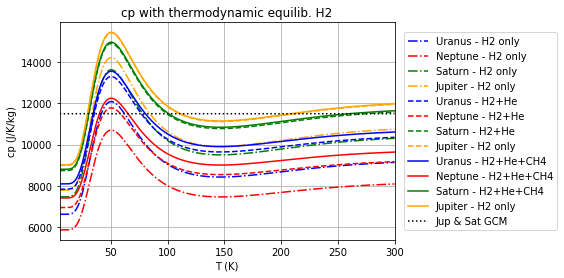

In [17]:
def cpH2(T):
    return 1000.0 * Cp(Cv_diato(Cvr_te(T),T)) / mu_H2

cp_H2   = cpH2(t_range)
cp_He   = 1000.0 * Cp(Cv_mono) / mu_He
cp_CH4  = 2080 # ok for 50-100 K : but T laws are available !

plt.clf()

fig,ax=plt.subplots(1,1,sharey=True)

ax0=ax
#ax1=ax[1]

cp_ura = x_H2_ura * mu_H2/mu_ura * cp_H2
cp_nep = x_H2_nep * mu_H2/mu_nep * cp_H2
cp_sat = x_H2_sat * mu_H2/mu_sat * cp_H2
cp_jup = x_H2_jup * mu_H2/mu_jup * cp_H2

ax0.plot(t_range,cp_ura,label='Uranus - H2 only',color='b',ls='-.')
ax0.plot(t_range,cp_nep,label='Neptune - H2 only',color='r',ls='-.')
ax0.plot(t_range,cp_sat,label='Saturn - H2 only',color='g',ls='-.')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange',ls='-.')

cp_ura = cp_ura + x_He_ura * mu_He/mu_ura * cp_He
cp_nep = cp_nep + x_He_nep * mu_He/mu_nep * cp_He
cp_sat = cp_sat + x_He_sat * mu_He/mu_sat * cp_He
cp_jup = cp_jup + x_He_jup * mu_He/mu_jup * cp_He

ax0.plot(t_range,cp_ura,label='Uranus - H2+He',color='b',ls='--')
ax0.plot(t_range,cp_nep,label='Neptune - H2+He',color='r',ls='--')
ax0.plot(t_range,cp_sat,label='Saturn - H2+He',color='g',ls='--')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange',ls='--')

cp_ura = cp_ura + x_CH4_ura * mu_CH4/mu_ura * cp_CH4
cp_nep = cp_nep + x_CH4_nep * mu_CH4/mu_nep * cp_CH4
cp_sat = cp_sat + x_CH4_sat * mu_CH4/mu_sat * cp_CH4
cp_jup = cp_jup + x_CH4_jup * mu_CH4/mu_jup * cp_CH4

ax0.plot(t_range,cp_ura,label='Uranus - H2+He+CH4',color='b')
ax0.plot(t_range,cp_nep,label='Neptune - H2+He+CH4',color='r')
ax0.plot(t_range,cp_sat,label='Saturn - H2+He+CH4',color='g')
ax0.plot(t_range,cp_jup,label='Jupiter - H2 only',color='orange')

ax0.plot(t_range,11500.0*np.ones(np.size(t_range)),label='Jup & Sat GCM',color='k',ls=':')

ax0.set_ylabel('cp (J/K/kg)')
ax0.set_xlabel('T (K)')
ax0.set_xlim(5,300)
ax0.set_title('cp with thermodynamic equilib. H2')

ax0.grid()
ax0.legend(loc='right',bbox_to_anchor=(1.5,0.5))

plt.show()

<Figure size 432x288 with 0 Axes>

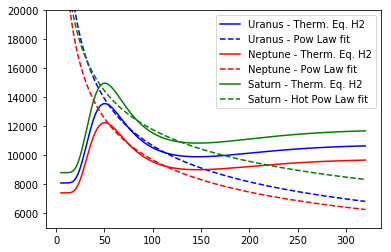

In [18]:
i_tmin = (np.abs(t_range - 60.)).argmin()
i_tmax = (np.abs(t_range - 130.)).argmin()

popt,pcov = curve_fit(powlaw_cp,t_range[i_tmin:i_tmax],cp_ura[i_tmin:i_tmax])
popt_ura_cpte = popt

popt,pcov = curve_fit(powlaw_cp,t_range[i_tmin:i_tmax],cp_nep[i_tmin:i_tmax])
popt_nep_cpte = popt


i_tmin = (np.abs(t_range - 70.)).argmin()
i_tmax = (np.abs(t_range - 150.)).argmin()
popt,pcov = curve_fit(powlaw_cp_hot,t_range[i_tmin:i_tmax],cp_sat[i_tmin:i_tmax])
popt_sat_cpte = popt

plt.clf()
fig,ax=plt.subplots()

ax.plot(t_range,cp_ura,label='Uranus - Therm. Eq. H2',color='b')
ax.plot(t_range,powlaw_cp(t_range,*popt_ura_cpte),label='Uranus - Pow Law fit',color='b',ls='--')
ax.plot(t_range,cp_nep,label='Neptune - Therm. Eq. H2',color='r')
ax.plot(t_range,powlaw_cp(t_range,*popt_nep_cpte),label='Neptune - Pow Law fit',color='r',ls='--')
ax.plot(t_range,cp_sat,label='Saturn - Therm. Eq. H2',color='g')
ax.plot(t_range,powlaw_cp_hot(t_range,*popt_sat_cpte),label='Saturn - Hot Pow Law fit',color='g',ls='--')

ax.set_ylim(5000.,20000.)
ax.legend(loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

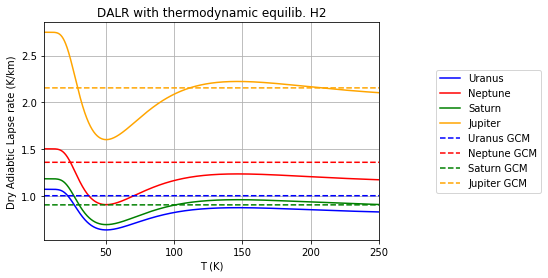

In [19]:
dalr_gcm_ura = np.ones(np.size(t_range)) * g_ura / 8.643
dalr_gcm_nep = np.ones(np.size(t_range)) * g_nep / 8.187
dalr_gcm_sat = np.ones(np.size(t_range)) * g_sat / 11.500
dalr_gcm_jup = np.ones(np.size(t_range)) * g_jup / 11.500

dalr_var_ura = g_ura / (cp_ura*0.001)
dalr_var_nep = g_nep / (cp_nep*0.001)
dalr_var_sat = g_sat / (cp_sat*0.001)
dalr_var_jup = g_jup / (cp_jup*0.001)

plt.clf()
fig,ax=plt.subplots()

ax.plot(t_range,dalr_var_ura,label='Uranus',color='b')
ax.plot(t_range,dalr_var_nep,label='Neptune',color='r')
ax.plot(t_range,dalr_var_sat,label='Saturn',color='g')
ax.plot(t_range,dalr_var_jup,label='Jupiter',color='orange')

ax.plot(t_range,dalr_gcm_ura,label='Uranus GCM',color='b',ls='--')
ax.plot(t_range,dalr_gcm_nep,label='Neptune GCM',color='r',ls='--')
ax.plot(t_range,dalr_gcm_sat,label='Saturn GCM',color='g',ls='--')
ax.plot(t_range,dalr_gcm_jup,label='Jupiter GCM',color='orange',ls='--')

ax.set_ylabel('Dry Adiabtic Lapse rate (K/km)')
ax.set_xlabel('T (K)')
ax.set_xlim(5,250)
ax.set_title('DALR with thermodynamic equilib. H2')

ax.legend(loc='right',bbox_to_anchor=(1.5,0.5))
ax.grid()

plt.show()

In [20]:
# calc_t(t_dalr_var_ura,dalr_var_ura,50.0)
# calc_t(t_dalr_gcm_ura,dalr_gcm_ura,50.0)
# calc_t(t_dalr_var_nep,dalr_var_nep,50.0)
# calc_t(t_dalr_gcm_nep,dalr_gcm_nep,50.0)
# calc_t(t_dalr_var_sat,dalr_var_sat,85.0)
# calc_t(t_dalr_gcm_sat,dalr_gcm_sat,85.0)
# calc_t(t_dalr_var_jup,dalr_var_jup,120.0)
# calc_t(t_dalr_gcm_jup,dalr_gcm_jup,120.0)

# # Save for comp with former one
# tuteq=t_dalr_var_ura
# tugcm=t_dalr_gcm_ura
# tnteq=t_dalr_var_nep
# tngcm=t_dalr_gcm_nep
# tsteq=t_dalr_var_sat
# tsgcm=t_dalr_gcm_sat
# tjteq=t_dalr_var_jup
# tjgcm=t_dalr_gcm_jup

# plt.clf()
# fig,ax=plt.subplots()

# ax.plot(t_dalr_var_ura,z_range,label='Uranus',color='b')
# ax.plot(t_dalr_gcm_ura,z_range,label='Uranus GCM',color='b',ls='--')
# ax.plot(t_dalr_var_nep,z_range,label='Neptune',color='r')
# ax.plot(t_dalr_gcm_nep,z_range,label='Neptune GCM',color='r',ls='--')
# ax.plot(t_dalr_var_sat,z_range,label='Saturn',color='g')
# ax.plot(t_dalr_gcm_sat,z_range,label='Saturn GCM',color='g',ls='--')
# ax.plot(t_dalr_var_jup,z_range,label='Jupiter',color='orange')
# ax.plot(t_dalr_gcm_jup,z_range,label='Jupiter GCM',color='orange',ls='--')

# ax.set_ylabel('z-under-tropopause (km)')
# ax.set_xlabel('T (K)')
# ax.set_xlim(40,200)
# ax.set_title('With thermodynamic equilib. H2')

# ax.legend(loc='right',bbox_to_anchor=(1.5,0.5))
# ax.grid()

# plt.show()

In [21]:
# plt.clf()
# fig,ax=plt.subplots()

# ax.plot(tuint,z_range,label='Uranus Int. H2',color='b',ls='--')
# ax.plot(tuteq,z_range,label='Uranus H2 Therm. Eq.',color='b',ls=':')
# ax.plot(tugcm,z_range,label='Uranus GCM',color='b')
# ax.plot(tnint,z_range,label='Neptune Int. H2',color='r',ls='--')
# ax.plot(tnteq,z_range,label='Neptune H2 Therm. Eq.',color='r',ls=':')
# ax.plot(tngcm,z_range,label='Neptune GCM',color='r')
# ax.plot(tsint,z_range,label='Saturn Int. H2',color='g',ls='--')
# ax.plot(tsteq,z_range,label='Saturn H2 Therm. Eq.',color='g',ls=':')
# ax.plot(tsgcm,z_range,label='Saturn GCM',color='g')
# ax.plot(tjint,z_range,label='Jupiter Int. H2',color='orange',ls='--')
# ax.plot(tjteq,z_range,label='Jupiter H2 Therm. Eq.',color='orange',ls=':')
# ax.plot(tjgcm,z_range,label='Jupiter GCM',color='orange')

# ax.set_ylabel('z-under-tropopause (km)')
# ax.set_xlabel('T (K)')
# ax.set_xlim(40,200)

# ax.legend(loc='right',bbox_to_anchor=(1.5,0.5))
# ax.grid()

# plt.show()

<Figure size 432x288 with 0 Axes>

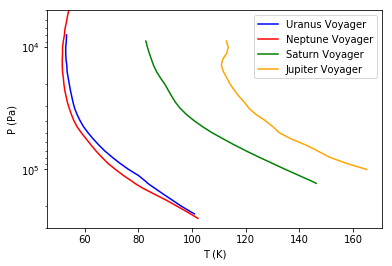

In [22]:
# Following T-P from Voyager data in Sanchez-Lavega

ura_tp = np.array([[ 79.43 , 53.3 ],
[ 89.13 , 53.2 ],
[ 100 , 53 ],
[ 112.2 , 53 ],
[ 125.89 , 53.1 ],
[ 141.25 , 53.4 ],
[ 158.49 , 53.5 ],
[ 177.83 , 53.9 ],
[ 199.53 , 54.3 ],
[ 223.87 , 54.7 ],
[ 251.19 , 55.2 ],
[ 281.84 , 55.7 ],
[ 316.23 , 56.3 ],
[ 354.81 , 57.2 ],
[ 398.11 , 58.3 ],
[ 446.68 , 59.6 ],
[ 501.19 , 61.3 ],
[ 562.34 , 63.2 ],
[ 630.96 , 65.3 ],
[ 707.95 , 67.6 ],
[ 794.33 , 70.3 ],
[ 891.25 , 73.2 ],
[ 1000 , 76.4 ],
[ 1122.02 , 80.1 ],
[ 1258.93 , 82.9 ],
[ 1298.48 , 83.5 ],
[ 1412.54 , 85.9 ],
[ 1584.89 , 89.2 ],
[ 1778.28 , 92.6 ],
[ 1995.26 , 96 ],
[ 2238.72 , 99.8 ],
[ 2308.81 , 100.9 ] ])

nep_tp = np.array( [[ 31.62 , 56.7 ],
[ 35.48 , 56 ],
[ 39.81 , 55.3 ],
[ 44.67 , 54.7 ],
[ 50.12 , 54.1 ],
[ 56.23 , 53.6 ],
[ 63.1 , 53.2 ],
[ 70.79 , 52.7 ],
[ 79.43 , 52.5 ],
[ 89.13 , 52.1 ],
[ 100 , 51.8 ],
[ 112.2 , 51.8 ],
[ 125.89 , 51.7 ],
[ 141.25 , 51.7 ],
[ 158.49 , 51.8 ],
[ 177.83 , 52.1 ],
[ 199.53 , 52.3 ],
[ 223.87 , 52.6 ],
[ 251.19 , 53.1 ],
[ 281.84 , 53.6 ],
[ 316.23 , 54.3 ],
[ 354.81 , 55.1 ],
[ 398.11 , 56 ],
[ 446.68 , 57.2 ],
[ 501.19 , 58.8 ],
[ 562.34 , 60.6 ],
[ 630.96 , 62.4 ],
[ 707.95 , 64.3 ],
[ 794.33 , 66.4 ],
[ 891.25 , 68.7 ],
[ 1000.0 , 71.5 ],
[ 1122.02 , 74.5 ],
[ 1258.93 , 77.9 ],
[ 1298.48 , 78.7 ],
[ 1412.54 , 81.4 ],
[ 1584.89 , 85.8 ],
[ 1778.28 , 90.3 ],
[ 1995.26 , 94.4 ],
[ 2238.72 , 98.4 ],
[ 2308.81 , 99.4 ],
[ 2511.89 , 102.2 ]])

sat_tp  = np.array( [[ 89.13 , 82.8 ],
[ 100.0 , 83.4 ],
[ 112.2  , 84.1 ],
[ 125.89 , 84.9 ],
[ 141.25 , 85.7 ],    
[ 158.49 , 86.8 ],
[ 177.83 , 88.2 ],
[ 199.53 , 89.8 ],
[ 223.87 , 91.1 ],
[ 251.19 , 92.4 ],
[ 281.84 , 93.8 ],
[ 316.23 , 95.6 ],
[ 354.81 , 97.9 ],
[ 398.11 , 100.7 ],
[ 446.68 , 103.9 ],
[ 501.19 , 107.5 ],
[ 562.34 , 111.6 ],
[ 630.96 , 115.8 ],
[ 707.95 , 120.3 ],
[ 794.33 , 125 ],
[ 891.25 , 129.9 ],
[ 1000 , 134.8 ],
[ 1122.02 , 139.9 ],
[ 1258.93 , 145 ],
[ 1298.48 , 146.2 ]])

jup_tp = np.array( [[ 89.13 , 112.8 ],
[ 100.0  , 113.5 ],
[ 112.2  , 112.9 ], 
[ 125.89 , 111.4 ],   
[ 141.25 , 110.9 ],
[ 158.49 , 111.7 ],
[ 177.83 , 112.9 ],
[ 199.53 , 114.1 ],
[ 223.87 , 115.7 ],
[ 251.19 , 117.4 ],
[ 281.84 , 119.5 ],
[ 316.23 , 121.2 ],
[ 354.81 , 123.8 ],
[ 398.11 , 127.2 ],
[ 446.68 , 130.1 ],
[ 501.19 , 132.5 ],
[ 562.34 , 136.9 ],
[ 630.96 , 142.4 ],
[ 707.95 , 146.9 ],
[ 794.33 , 151.2 ],
[ 891.25 , 157.5 ],
[ 1000.0 , 165 ]])


plt.clf()
fig,ax=plt.subplots()

ax.plot(ura_tp[:,1],ura_tp[:,0]*100.0,label='Uranus Voyager',color='b')
ax.plot(nep_tp[:,1],nep_tp[:,0]*100.0,label='Neptune Voyager',color='r')
ax.plot(sat_tp[:,1],sat_tp[:,0]*100.0,label='Saturn Voyager',color='g')
ax.plot(jup_tp[:,1],jup_tp[:,0]*100.0,label='Jupiter Voyager',color='orange')
ax.set_yscale('log')
ax.set_ylim(3.e5,5.e3)
ax.set_ylabel('P (Pa)')
ax.set_xlabel('T (K)')

ax.legend(loc='best')

plt.show()

In [23]:
def tpot_gcm(T,p,cp,mu):
    return T*(p[-1]/p)**(R/(mu*cp))


<Figure size 432x288 with 0 Axes>

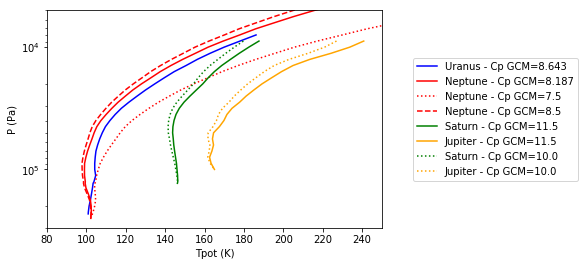

In [24]:
tpot_ura_gcm = tpot_gcm(ura_tp[:,1],ura_tp[:,0],8.643,mu_ura)
tpot_nep_gcm = tpot_gcm(nep_tp[:,1],nep_tp[:,0],8.187,mu_nep)
tpot_sat_gcm = tpot_gcm(sat_tp[:,1],sat_tp[:,0],11.5,mu_sat)
tpot_jup_gcm = tpot_gcm(jup_tp[:,1],jup_tp[:,0],11.5,mu_jup)

tpot_nep_gcm_bis = tpot_gcm(nep_tp[:,1],nep_tp[:,0],7.5,mu_ura)
tpot_nep_gcm_ter = tpot_gcm(nep_tp[:,1],nep_tp[:,0],8.5,mu_nep)

tpot_sat_gcm_ter = tpot_gcm(sat_tp[:,1],sat_tp[:,0],10.0,mu_nep)
tpot_jup_gcm_ter = tpot_gcm(jup_tp[:,1],jup_tp[:,0],10.0,mu_nep)

plt.clf()
fig,ax=plt.subplots()

ax.plot(tpot_ura_gcm[:],ura_tp[:,0]*100.0,label='Uranus - Cp GCM=8.643',color='b')
ax.plot(tpot_nep_gcm[:],nep_tp[:,0]*100.0,label='Neptune - Cp GCM=8.187',color='r')
ax.plot(tpot_nep_gcm_bis[:],nep_tp[:,0]*100.0,label='Neptune - Cp GCM=7.5',color='r',ls=':')
ax.plot(tpot_nep_gcm_ter[:],nep_tp[:,0]*100.0,label='Neptune - Cp GCM=8.5',color='r',ls='--')
ax.plot(tpot_sat_gcm[:],sat_tp[:,0]*100.0,label='Saturn - Cp GCM=11.5',color='g')
ax.plot(tpot_jup_gcm[:],jup_tp[:,0]*100.0,label='Jupiter - Cp GCM=11.5',color='orange')
ax.plot(tpot_sat_gcm_ter[:],sat_tp[:,0]*100.0,label='Saturn - Cp GCM=10.0',color='g',ls=':')
ax.plot(tpot_jup_gcm_ter[:],jup_tp[:,0]*100.0,label='Jupiter - Cp GCM=10.0',color='orange',ls=':')
ax.set_yscale('log')
ax.set_ylim(3.e5,5.e3)
ax.set_ylabel('P (Pa)')
ax.set_xlim(80.,250.)
ax.set_xlabel('Tpot (K)')

ax.legend(loc='right',bbox_to_anchor=(1.6,0.5))

plt.show()

In [25]:
def tpot_cpvar(T,p,T0,cp0,mu,nu):
    return (T**nu + nu*T0**nu * (R/(mu*cp0) * np.log(p[-1]/p)))**(1.0/nu)

<Figure size 432x288 with 0 Axes>

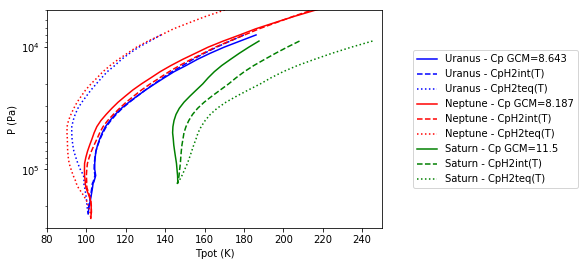

In [26]:
tpot_ura_cpint = tpot_cpvar(ura_tp[:,1],ura_tp[:,0],50.0,popt_ura_cpint[0]/1000.0,mu_ura,popt_ura_cpint[1])
tpot_ura_cpteq = tpot_cpvar(ura_tp[:,1],ura_tp[:,0],50.0,popt_ura_cpte[0]/1000.0,mu_ura,popt_ura_cpte[1])
tpot_nep_cpint = tpot_cpvar(nep_tp[:,1],nep_tp[:,0],50.0,popt_nep_cpint[0]/1000.0,mu_nep,popt_nep_cpint[1])
tpot_nep_cpteq = tpot_cpvar(nep_tp[:,1],nep_tp[:,0],50.0,popt_nep_cpte[0]/1000.0,mu_nep,popt_nep_cpte[1])
tpot_sat_cpint = tpot_cpvar(sat_tp[:,1],sat_tp[:,0],50.0,popt_sat_cpint[0]/1000.0,mu_sat,popt_sat_cpint[1])
tpot_sat_cpteq = tpot_cpvar(sat_tp[:,1],sat_tp[:,0],50.0,popt_sat_cpte[0]/1000.0,mu_sat,popt_sat_cpte[1])
#tpot_jup_var = tpot_cpvar(jup_tp[:,1],jup_tp[:,0],11.5,mu_jup)

plt.clf()
fig,ax=plt.subplots()

ax.plot(tpot_ura_gcm[:],ura_tp[:,0]*100.0,label='Uranus - Cp GCM=8.643',color='b')
ax.plot(tpot_ura_cpint[:],ura_tp[:,0]*100.0,label='Uranus - CpH2int(T)',color='b',ls='--')
ax.plot(tpot_ura_cpteq[:],ura_tp[:,0]*100.0,label='Uranus - CpH2teq(T)',color='b',ls=':')
ax.plot(tpot_nep_gcm[:],nep_tp[:,0]*100.0,label='Neptune - Cp GCM=8.187',color='r')
ax.plot(tpot_nep_cpint[:],nep_tp[:,0]*100.0,label='Neptune - CpH2int(T)',color='r',ls='--')
ax.plot(tpot_nep_cpteq[:],nep_tp[:,0]*100.0,label='Neptune - CpH2teq(T)',color='r',ls=':')
ax.plot(tpot_sat_gcm[:],sat_tp[:,0]*100.0,label='Saturn - Cp GCM=11.5',color='g')
ax.plot(tpot_sat_cpint[:],sat_tp[:,0]*100.0,label='Saturn - CpH2int(T)',color='g',ls='--')
ax.plot(tpot_sat_cpteq[:],sat_tp[:,0]*100.0,label='Saturn - CpH2teq(T)',color='g',ls=':')
#ax.plot(tpot_jup_gcm[:],jup_tp[:,0]*100.0,label='Jupiter - Cp GCM=11.5',color='orange')
ax.set_yscale('log')
ax.set_ylim(3.e5,5.e3)
ax.set_ylabel('P (Pa)')
ax.set_xlim(80.,250.)
ax.set_xlabel('Tpot (K)')

ax.legend(loc='right',bbox_to_anchor=(1.6,0.5))

plt.show()